In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
hotel_df = pd.read_csv("hotel_bookings_modified.csv")

In [3]:
hotel_df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,adr,required_car_parking_spaces
0,Resort Hotel,342,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0.0,0
1,Resort Hotel,737,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0.0,0
2,Resort Hotel,7,2015,July,0,1,1,0.0,0,BB,GBR,Direct,75.0,0
3,Resort Hotel,13,2015,July,0,1,1,0.0,0,BB,GBR,Corporate,75.0,0
4,Resort Hotel,14,2015,July,0,2,2,0.0,0,BB,GBR,Online TA,98.0,0


In [4]:
hotel_df.shape

(119390, 14)

In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   lead_time                    119390 non-null  int64  
 2   arrival_date_year            119390 non-null  int64  
 3   arrival_date_month           119390 non-null  object 
 4   stays_in_weekend_nights      119390 non-null  int64  
 5   stays_in_week_nights         119390 non-null  int64  
 6   adults                       119390 non-null  int64  
 7   children                     119386 non-null  float64
 8   babies                       119390 non-null  int64  
 9   meal                         119390 non-null  object 
 10  country                      118902 non-null  object 
 11  market_segment               119390 non-null  object 
 12  adr                          119390 non-null  float64
 13 

In [6]:
hotel_df.describe()

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,required_car_parking_spaces
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,0.927599,2.500302,1.856403,0.103890,0.007949,101.831122,0.062518
std,106.863097,0.707476,0.998613,1.908286,0.579261,0.398561,0.097436,50.535790,0.245291
min,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000
25%,18.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,69.290000,0.000000
50%,69.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,94.575000,0.000000
75%,160.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,126.000000,0.000000
max,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,5400.000000,8.000000


In [7]:
hotel_df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment
count,119390,119390,119390,118902,119390
unique,2,12,5,177,8
top,City Hotel,August,BB,PRT,Online TA
freq,79330,13877,92310,48590,56477


EDA

In [8]:
hotel_df.corr()

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr,required_car_parking_spaces
lead_time,1.000000,0.040142,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.063077,-0.116451
arrival_date_year,0.040142,1.000000,0.021497,0.030883,0.029635,0.054624,-0.013192,0.197580,-0.013684
stays_in_weekend_nights,0.085671,0.021497,1.000000,0.498969,0.091871,0.045793,0.018483,0.049342,-0.018554
stays_in_week_nights,0.165799,0.030883,0.498969,1.000000,0.092976,0.044203,0.020191,0.065237,-0.024859
adults,0.119519,0.029635,0.091871,0.092976,1.000000,0.030447,0.018146,0.230641,0.014785
children,-0.037622,0.054624,0.045793,0.044203,0.030447,1.000000,0.024030,0.324854,0.056253
babies,-0.020915,-0.013192,0.018483,0.020191,0.018146,0.024030,1.000000,0.029186,0.037383
adr,-0.063077,0.197580,0.049342,0.065237,0.230641,0.324854,0.029186,1.000000,0.056628
required_car_parking_spaces,-0.116451,-0.013684,-0.018554,-0.024859,0.014785,0.056253,0.037383,0.056628,1.000000


In [9]:
hotel_df.isnull().sum()

hotel                            0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
market_segment                   0
adr                              0
required_car_parking_spaces      0
dtype: int64

In [10]:
hotel_df = hotel_df.fillna(0)

In [11]:
hotel_df.isnull().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
adr                            0
required_car_parking_spaces    0
dtype: int64

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

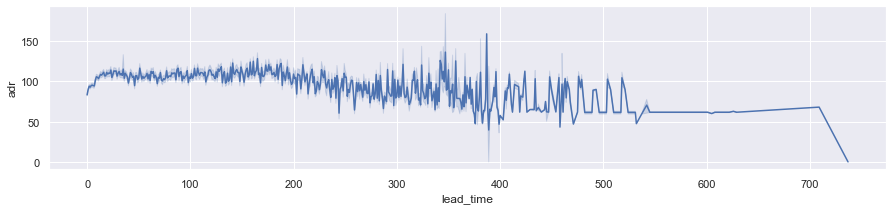

In [12]:
plt.figure(figsize=(15,3))
sns.lineplot(data=hotel_df,x='lead_time',y='adr')

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

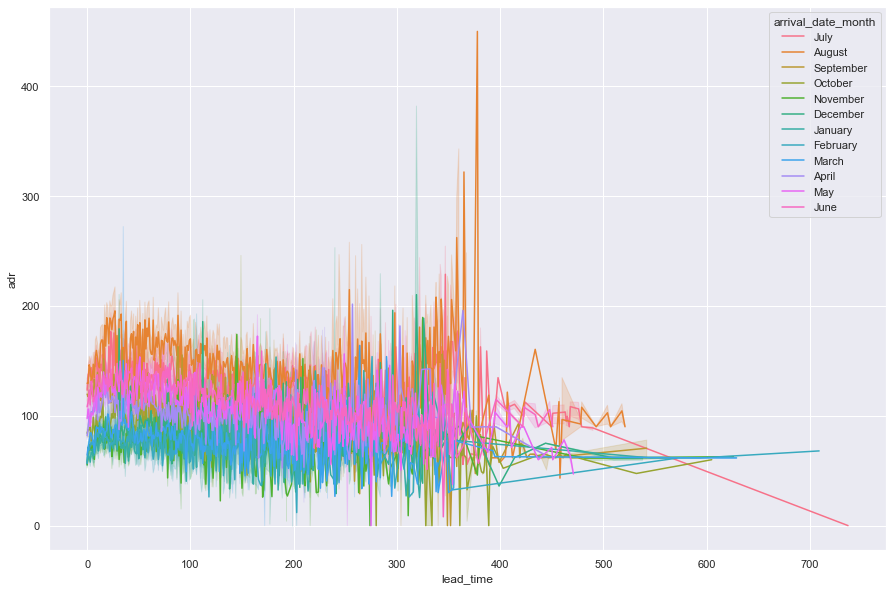

In [13]:
plt.figure(figsize=(15,10))
sns.lineplot(data=hotel_df,x='lead_time',y='adr', hue='arrival_date_month')

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

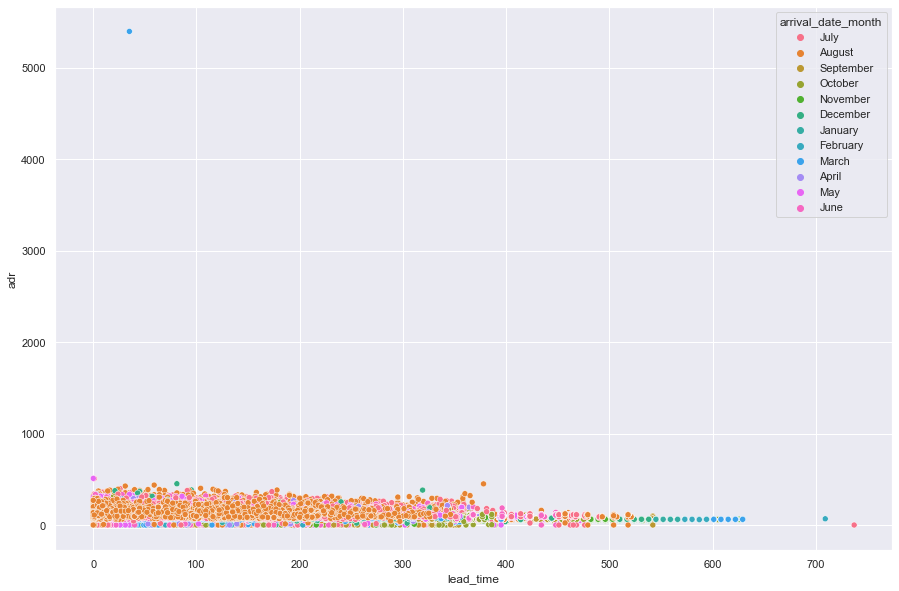

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=hotel_df,x='lead_time',y='adr', hue='arrival_date_month')

converting string to integrer/ number 

In [15]:
hotel_df = hotel_df.astype({"hotel":'string'})
hotel_df["hotel"] = hotel_df["hotel"].replace(["City Hotel", "Resort Hotel"],["0", "1"])
hotel_df = hotel_df.astype({"market_segment":'string'})
hotel_df["market_segment"] = hotel_df["market_segment"].replace(["Online TA", "Offline TA/TO", "Groups", "Direct", "Corporate", "Complementary", "Aviation"],["0", "1", "2","3", "4","5", "6"])
hotel_df = hotel_df.astype({"arrival_date_month":'string'})
hotel_df["arrival_date_month"] = hotel_df["arrival_date_month"].replace(["January","February","March","April","May","June","July","August","September","October","November","December"
],["0", "1", "2","3", "4","5", "6","7","8","9","10","11"])


In [16]:
hotel_df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,adr,required_car_parking_spaces
0,1,342,2015,6,0,0,2,0.0,0,BB,PRT,3,0.0,0
1,1,737,2015,6,0,0,2,0.0,0,BB,PRT,3,0.0,0
2,1,7,2015,6,0,1,1,0.0,0,BB,GBR,3,75.0,0
3,1,13,2015,6,0,1,1,0.0,0,BB,GBR,4,75.0,0
4,1,14,2015,6,0,2,2,0.0,0,BB,GBR,0,98.0,0


DataFrame Head:


,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,adr,required_car_parking_spaces
0,1,342,2015,6,0,0,2,0.0,0,BB,PRT,3,0.0,0
1,1,737,2015,6,0,0,2,0.0,0,BB,PRT,3,0.0,0
2,1,7,2015,6,0,1,1,0.0,0,BB,GBR,3,75.0,0


DataFrame Tail:


,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,adr,required_car_parking_spaces
119387,0,34,2017,7,2,5,2,0.0,0,BB,DEU,0,157.71,0
119388,0,109,2017,7,2,5,2,0.0,0,BB,GBR,0,104.40,0
119389,0,205,2017,7,2,7,2,0.0,0,HB,DEU,0,151.20,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(119390, 14)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  string 
 1   lead_time                    119390 non-null  int64  
 2   arrival_date_year            119390 non-null  int64  
 3   arrival_date_month           119390 non-null  string 
 4   stays_in_weekend_nights      119390 non-null  int64  
 5   stays_in_week_nights         119390 non-null  int64  
 6   adults                       119390 non-null  int64  
 7   children                     119390 non-null  float64
 8   babies                       119390 non-

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
lead_time,119390,104.011,69,106.863,0,18,69,160,737,1.346533,1.696328
arrival_date_year,119390,2016.157,2016,0.707,2015,2016,2016,2017,2017,-0.232580,-0.994572
stays_in_weekend_nights,119390,0.928,1,0.999,0,0,1,2,19,1.380029,7.173715
stays_in_week_nights,119390,2.5,2,1.908,0,1,2,3,50,2.862213,24.283488
adults,119390,1.856,2,0.579,0,2,2,2,55,18.317575,1352.058441
children,119390,0.104,0,0.399,0,0,0,0,10,4.112618,18.673631
babies,119390,0.008,0,0.097,0,0,0,0,10,24.646235,1633.879756
adr,119390,101.831,94.575,50.536,-6.38,69.29,94.575,126,5400,10.530082,1013.147369
required_car_parking_spaces,119390,0.063,0,0.245,0,0,0,0,8,4.163181,29.996750


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



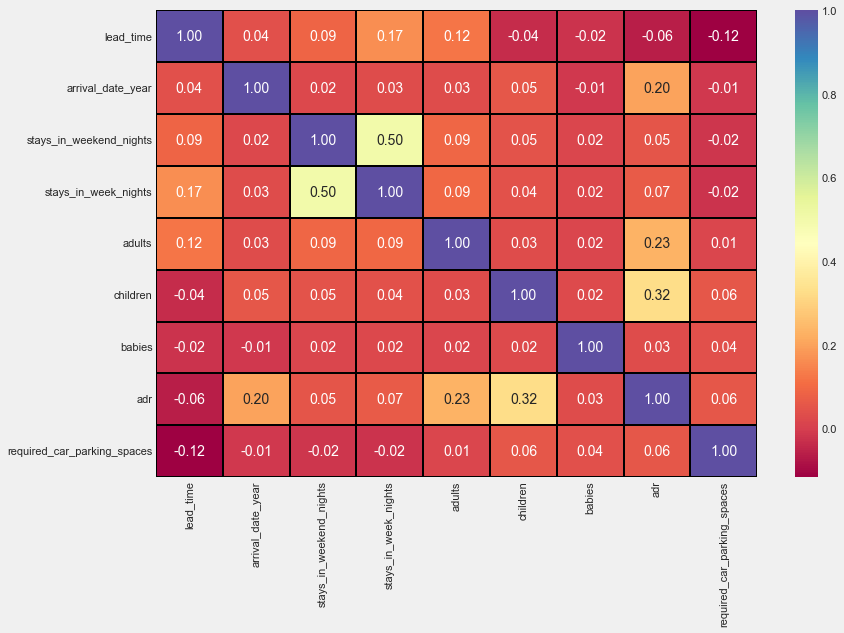

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



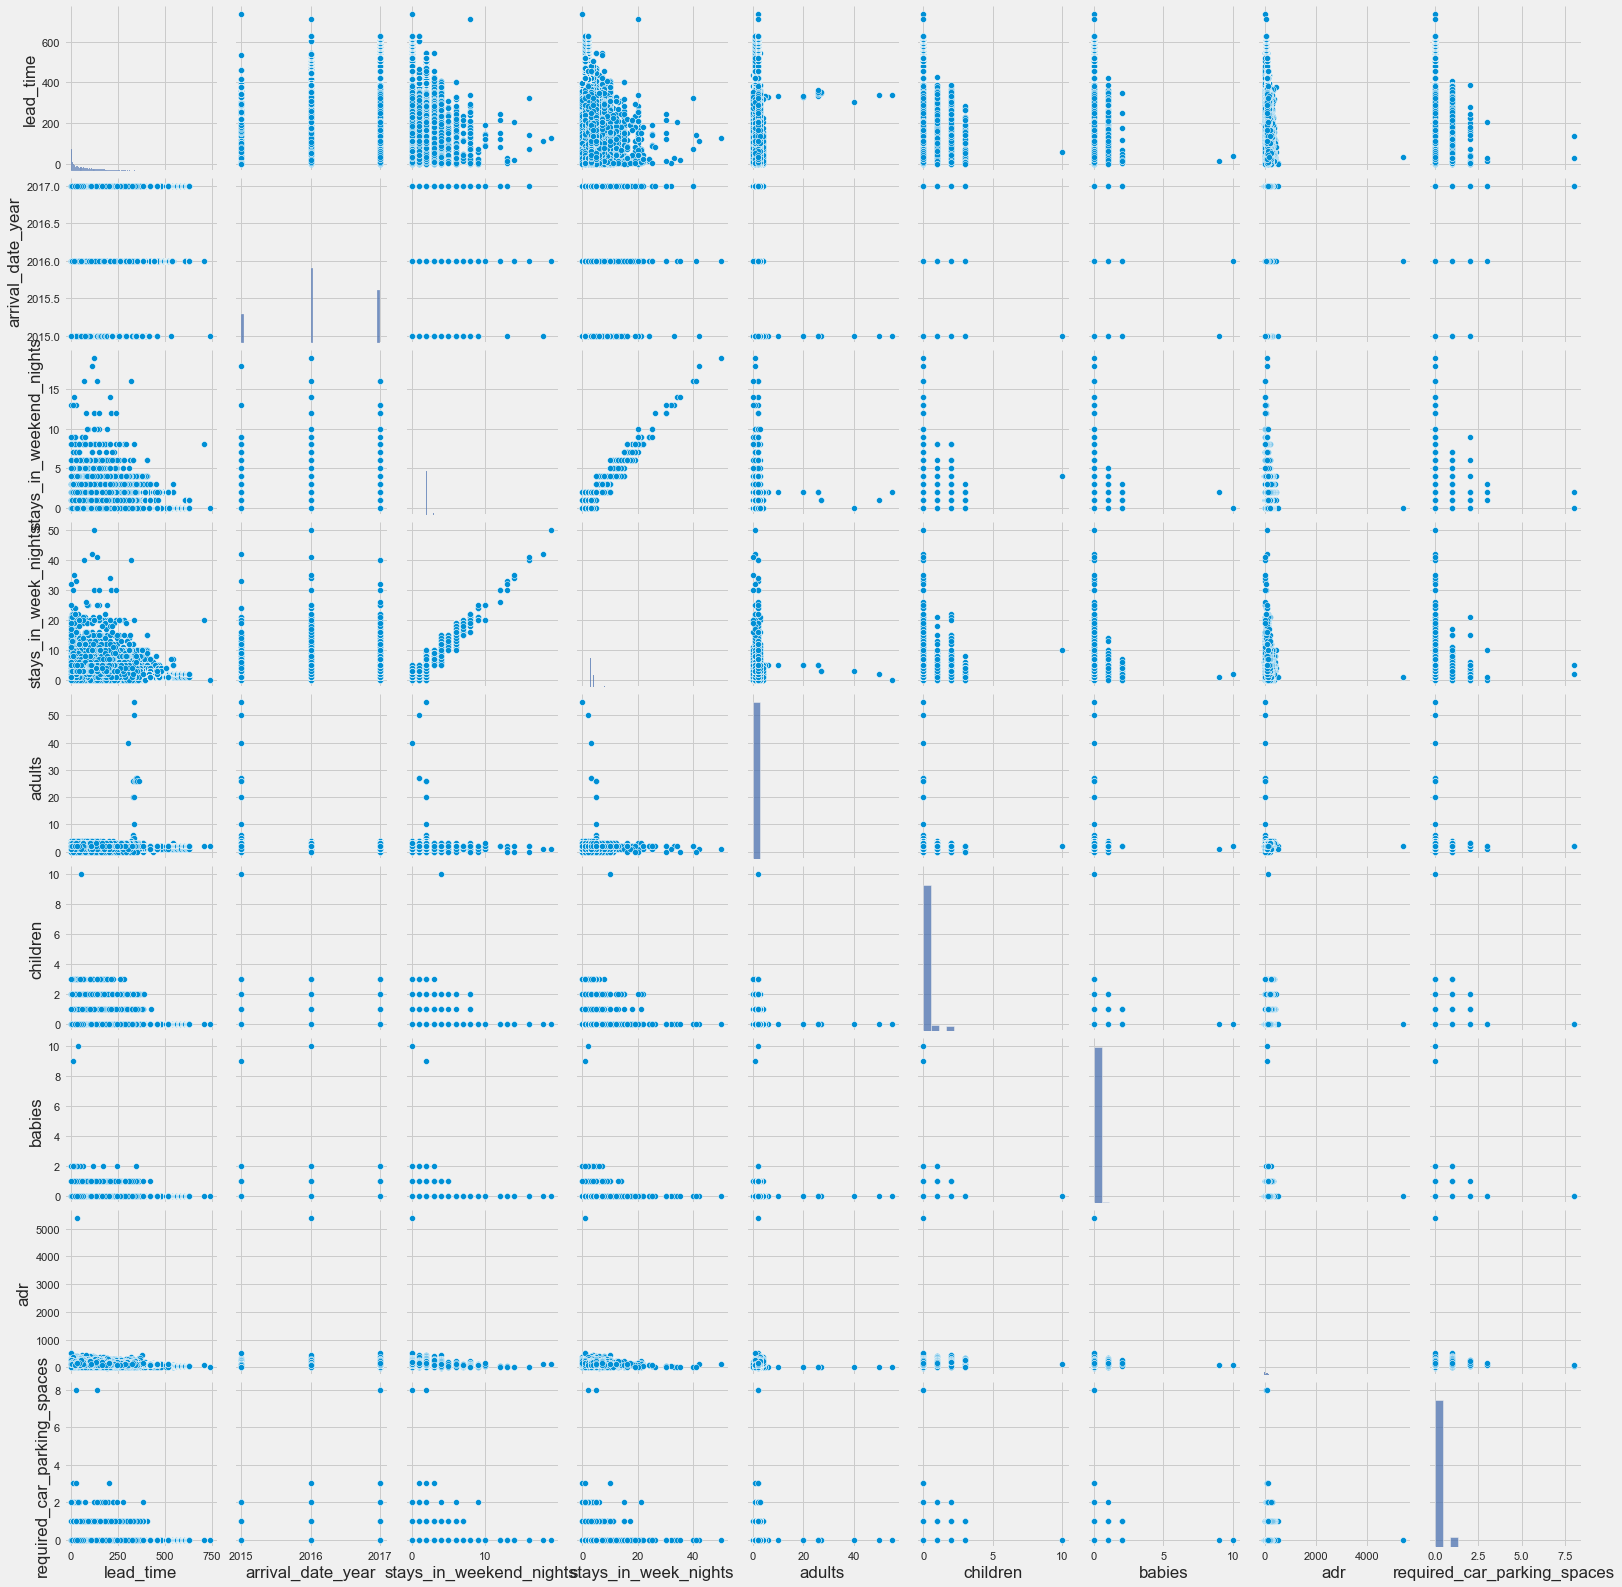

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



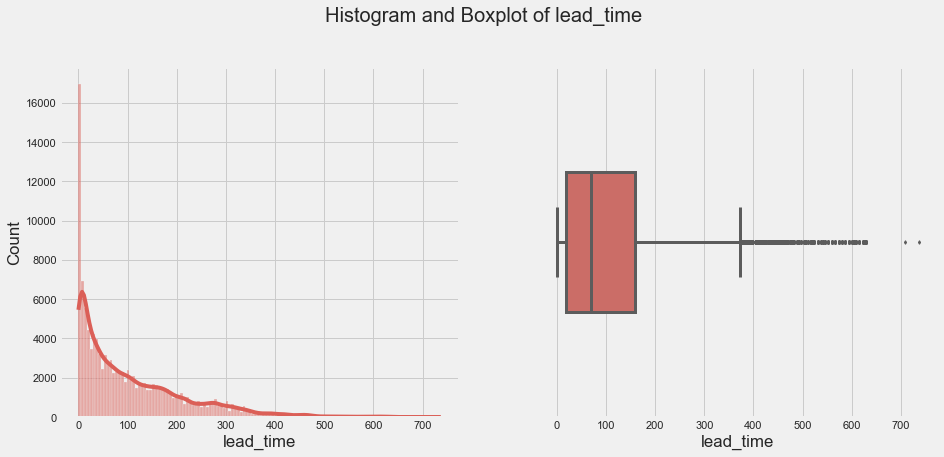

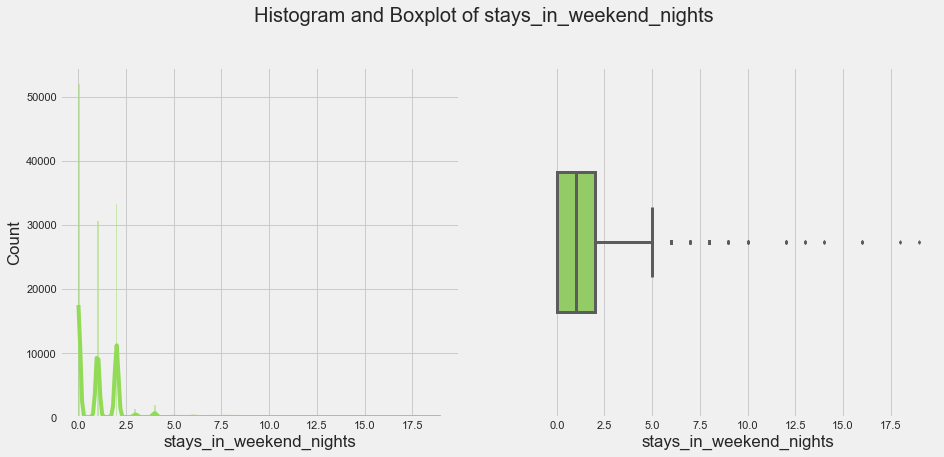

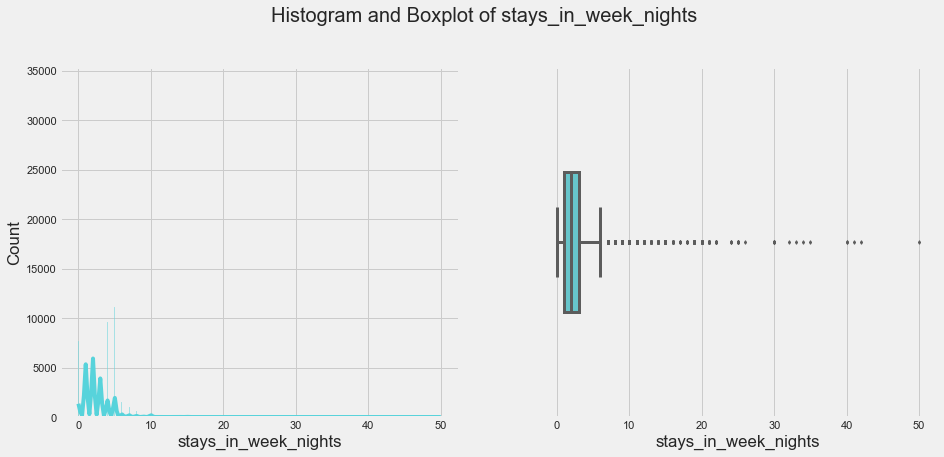

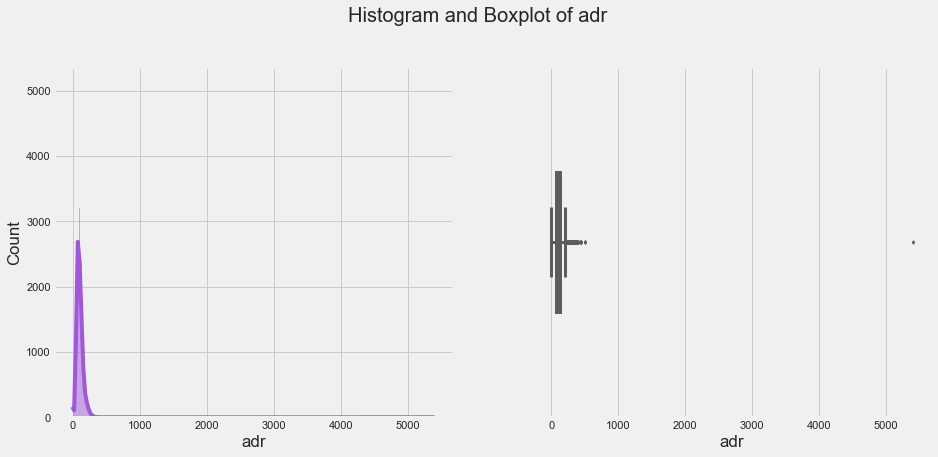

----------------------------------------------------------------------------------------------------
Countplot(s):



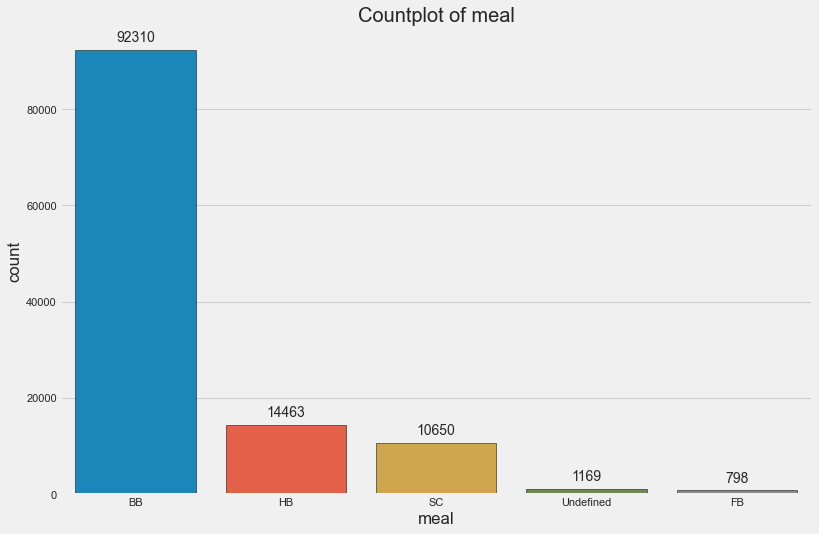

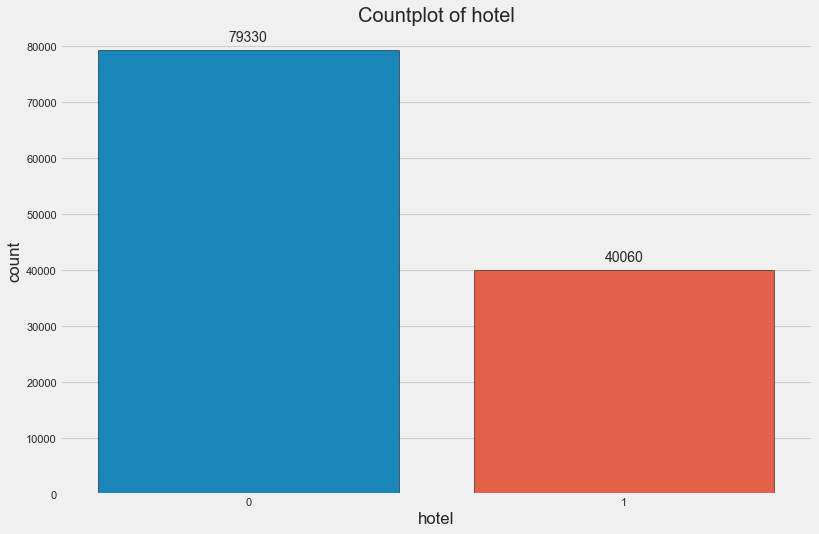

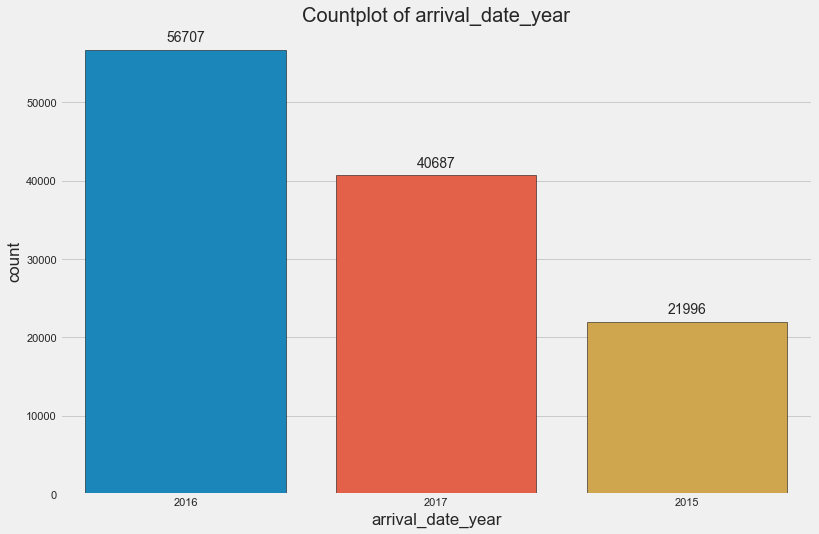

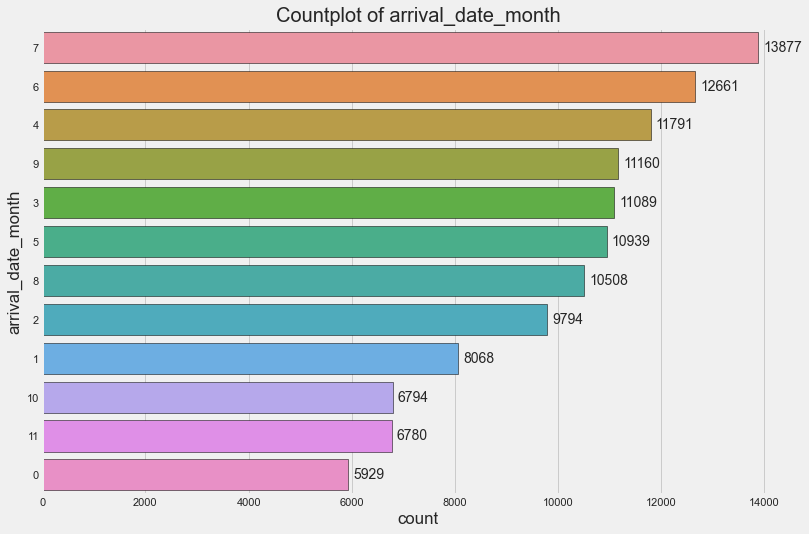

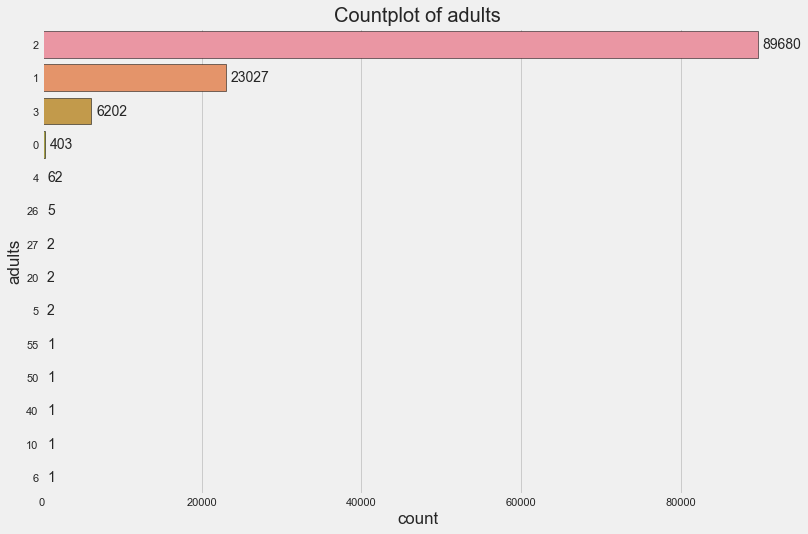

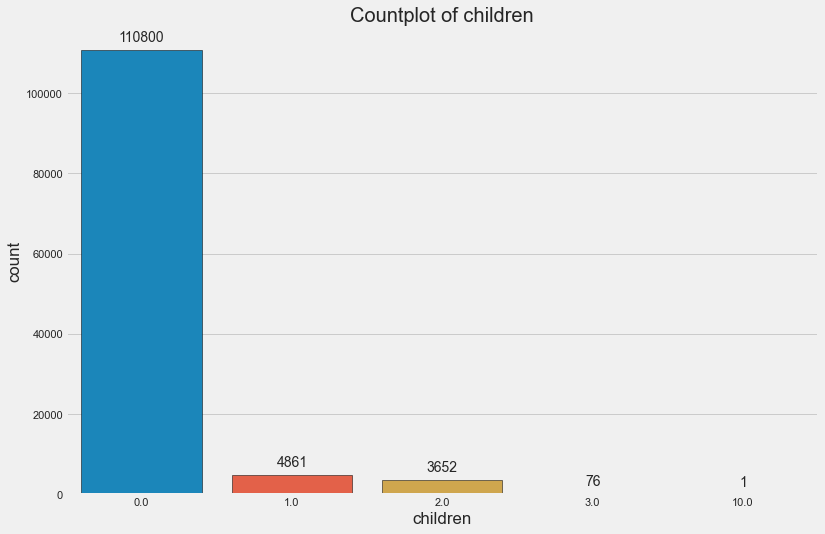

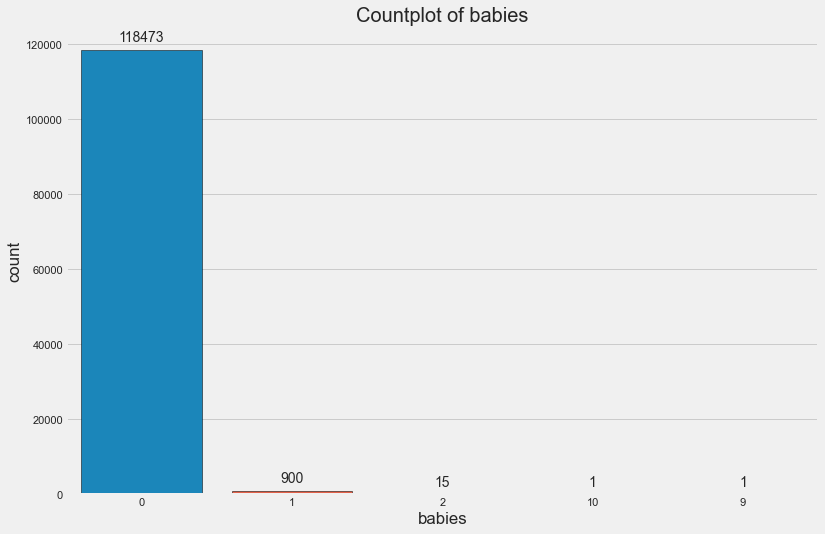

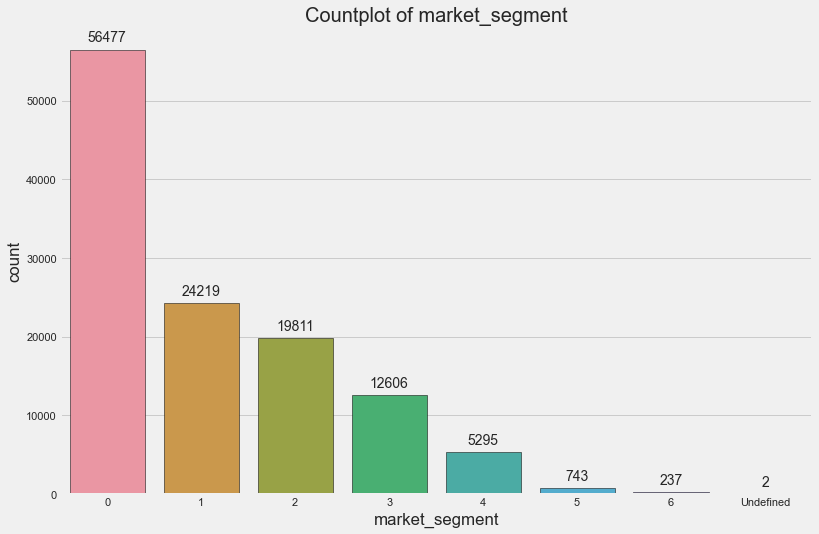

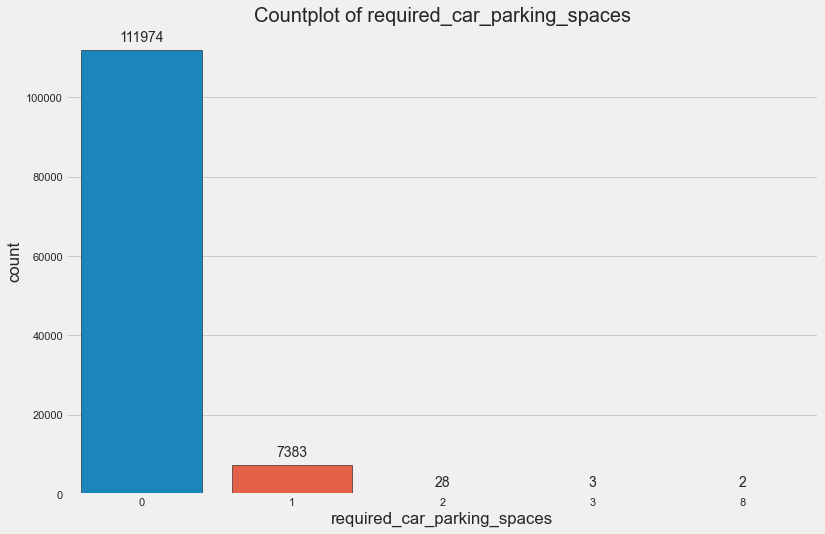

In [17]:
from fasteda import fast_eda
fast_eda(hotel_df)

In [25]:
x = hotel_df.drop(['adr','country', 'meal'], axis = 1)

we dropping ADR for the purpose of checking dependent variable or not

In [26]:
y = hotel_df['adr']

^^^ dependedt variable, on sales etc. ADR is increasing if sales are performig good etc

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size = 0.2)

^^^ importing the library for ML Linear regression. continuos values

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'